# Practical 26

# Project on implementation of k-means clustering for obtaining optimal no.of clusters and their centroids on Facebook Live sellers in Thailand dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [2]:
df = pd.read_csv(r"D:\Machine Learning\Live.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
x = df.iloc[:,[1,3,4,5,6,7,8,9,10,11]]
x  #extract independent variables only

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [4]:
# label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
x.iloc[:,0] = le.fit_transform(x.iloc[:,0])
x

C:\Users\ANIKET KUMAR\AppData\Local\Temp\ipykernel_1220\1029357773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,0] = le.fit_transform(x.iloc[:,0])


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #max limit comes from -3 to +3
x.iloc[:,:] = sc.fit_transform(x.iloc[:,:])
x

C:\Users\ANIKET KUMAR\AppData\Local\Temp\ipykernel_1220\2267271836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,:] = sc.fit_transform(x.iloc[:,:])


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...
7045,-0.748106,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.748106,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.748106,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,-0.748106,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


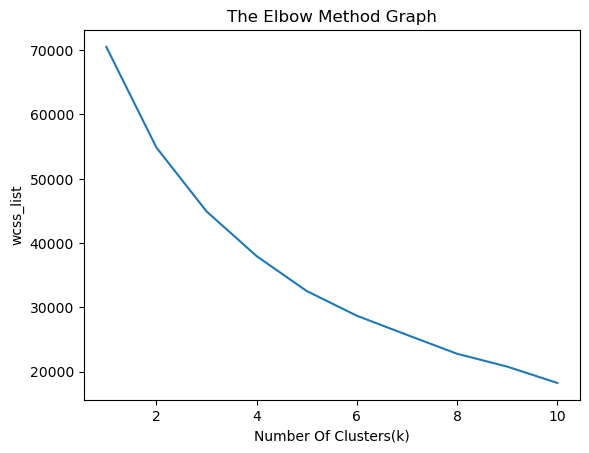

In [6]:
# Finding the optimal no. of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list = []  #initialising the list for the values of WCSS
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number Of Clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()  #silhoutte curve

In [7]:
# by graph it is difficult to the value of "K" so thier is a direct formula to find that.
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list, curve = "convex",direction = "decreasing")
kl.elbow

4

In [8]:
k_mean = KMeans(n_clusters =3, init = "k-means++", random_state = 1)
y_pred = k_mean.fit_predict(x)
y_pred          

array([0, 0, 0, ..., 0, 0, 0])

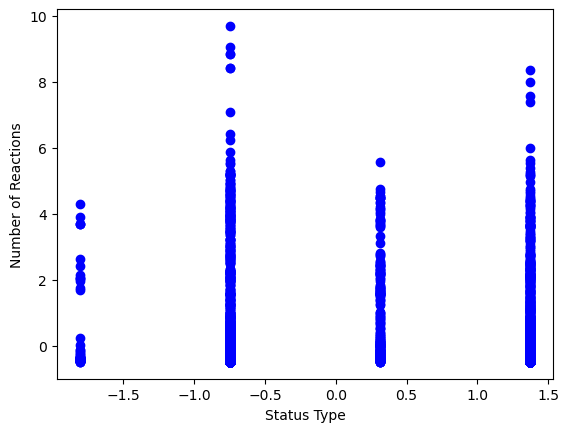

In [9]:
mtp.scatter(x.iloc[:,0], x.iloc[:,1], c = 'blue', label = 'All Data Points')
mtp.xlabel('Status Type')
mtp.ylabel('Number of Reactions')
mtp.show()

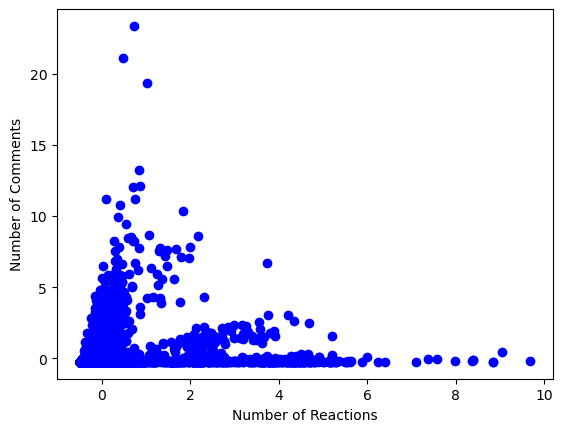

In [10]:
mtp.scatter(x.iloc[:,1], x.iloc[:,2], c = 'blue', label = 'All Data Points')
mtp.xlabel('Number of Reactions')
mtp.ylabel('Number of Comments')
mtp.show()

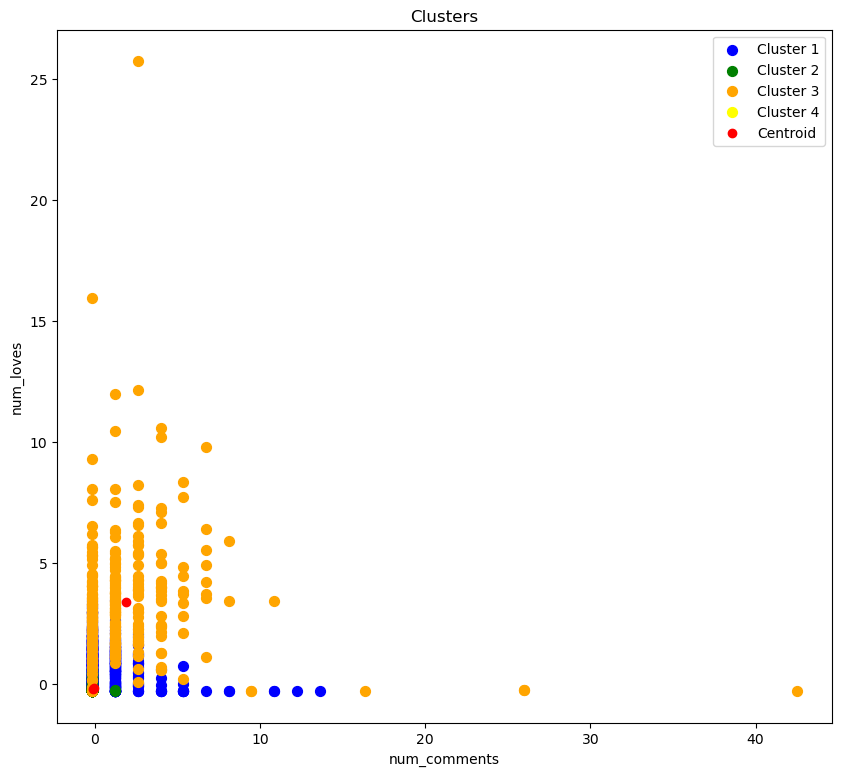

In [16]:
# Visualizing the clusters
# For first cluster
fig = mtp.figure(figsize =(10,9))
mtp.scatter(x.iloc[y_pred==0,9],x.iloc[y_pred==0,3],s=50,c='blue',label='Cluster 1')
# For second cluster
mtp.scatter(x.iloc[y_pred==1,9],x.iloc[y_pred==1,3],s=50,c='green',label='Cluster 2')
# For third cluster
mtp.scatter(x.iloc[y_pred==2,9],x.iloc[y_pred==2,3],s=50,c='orange',label='Cluster 3')
# For fourth cluster
mtp.scatter(x.iloc[y_pred==3,9],x.iloc[y_pred==3,3],s=50,c='yellow',label='Cluster 4')

mtp.scatter(k_mean.cluster_centers_[:,9],k_mean.cluster_centers_[:,3],c='red',label='Centroid')
mtp.title("Clusters")
mtp.xlabel("num_comments")
mtp.ylabel("num_loves")
mtp.legend()
mtp.show()

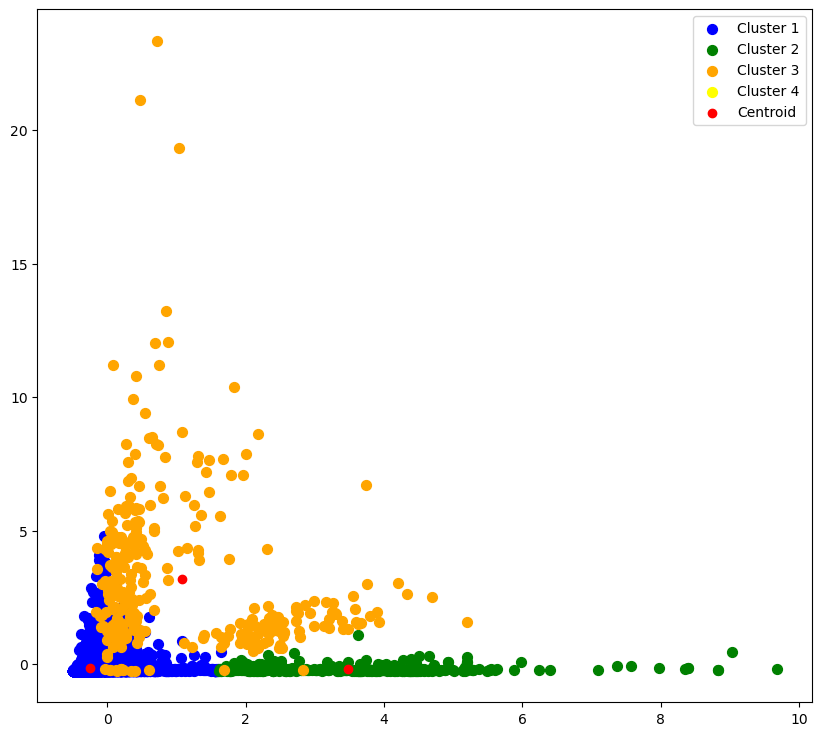

In [18]:
# Visualizing the clusters
# For first cluster
fig = mtp.figure(figsize =(10,9))
mtp.scatter(x.iloc[y_pred==0,1],x.iloc[y_pred==0,2],s=50,c='blue',label='Cluster 1')
# For second cluster
mtp.scatter(x.iloc[y_pred==1,1],x.iloc[y_pred==1,2],s=50,c='green',label='Cluster 2')
# For third cluster
mtp.scatter(x.iloc[y_pred==2,1],x.iloc[y_pred==2,2],s=50,c='orange',label='Cluster 3')
# For fourth cluster
mtp.scatter(x.iloc[y_pred==3,1],x.iloc[y_pred==3,2],s=50,c='yellow',label='Cluster 4')

mtp.scatter(k_mean.cluster_centers_[:,1],k_mean.cluster_centers_[:,2],c='red',label='Centroid')
mtp.legend()